# Exploratory Data Analysis - Train Speed

Dataset : Average operating speed of popular trains in India 

As an intern under the Ministry Of Railways , find the correlation between average operating speed and frequency

of train delays/accidents and derive other any other relevant insights(passenger satisfaction, % of seat 

occupied etc.)


In [1]:
import pandas as pd
import datetime
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

In [2]:
import ppscore as pps

from scipy.stats import kurtosis, skew  # explore statistics of numerical values
from scipy import stats

**INPUT DATA**

In [3]:
import os
os.getcwd()
os.chdir("D:\DATA ANALYTICS\CODEVITA")

**EXPLORING THE DATA**

In [4]:
trains = pd.read_csv(r'Indian_railway1.csv',encoding_errors = 'replace')
trains.head()

Train No    Train Name SEQ Station Code  Station Name Arrival time  \
0      107  SWV-MAO-VLNK   1          SWV  SAWANTWADI R     00:00:00   
1      107  SWV-MAO-VLNK   2         THVM        THIVIM     11:06:00   
2      107  SWV-MAO-VLNK   3         KRMI       KARMALI     11:28:00   
3      107  SWV-MAO-VLNK   4          MAO   MADGOAN JN.     12:10:00   
4      108  VLNK-MAO-SWV   1          MAO   MADGOAN JN.     00:00:00   

  Departure Time Distance Source Station Source Station Name  \
0       10:25:00        0            SWV     SAWANTWADI ROAD   
1       11:08:00       32            SWV     SAWANTWADI ROAD   
2       11:30:00       49            SWV     SAWANTWADI ROAD   
3       00:00:00       78            SWV     SAWANTWADI ROAD   
4       20:30:00        0            MAO         MADGOAN JN.   

  Destination Station Destination Station Name  
0                 MAO              MADGOAN JN.  
1                 MAO              MADGOAN JN.  
2                 MAO              MADGOAN JN.  
3                 MAO              MADGOAN JN.  
4                 SWV          SAWANTWADI ROAD

In [5]:
trains.shape

(186124, 12)

In [6]:
trains['Station Name'].unique()

array(['SAWANTWADI R', 'THIVIM', 'KARMALI', ..., 'MANKHURD', 'CHEMBUR',
       'NERUL'], dtype=object)

In [7]:
# # displaying the column names
trains.columns.values

array(['Train No', 'Train Name', 'SEQ', 'Station Code', 'Station Name',
       'Arrival time', 'Departure Time', 'Distance', 'Source Station',
       'Source Station Name', 'Destination Station',
       'Destination Station Name'], dtype=object)

In [8]:
trains = trains.dropna(how="any")

In [9]:
trains.dtypes

Train No                    object
Train Name                  object
SEQ                         object
Station Code                object
Station Name                object
Arrival time                object
Departure Time              object
Distance                    object
Source Station              object
Source Station Name         object
Destination Station         object
Destination Station Name    object
dtype: object

In [10]:
# Converting Object to int

trains = trains.astype({'Train No':'int64','Distance':'int64','SEQ':'int64'})
trains.dtypes

Train No                     int64
Train Name                  object
SEQ                          int64
Station Code                object
Station Name                object
Arrival time                object
Departure Time              object
Distance                     int64
Source Station              object
Source Station Name         object
Destination Station         object
Destination Station Name    object
dtype: object

In [11]:
def table(trains):
    data = pd.DataFrame(trains.dtypes,columns=['dtypes'])
    data = data.reset_index()
    data['name'] = data['index']
    data = data[['name','dtypes']]
    data['Missing'] = trains.isnull().sum().values
    data['Uniques'] = trains.nunique().values
    data['First Value'] = trains.loc[0].values
    data['Second Value'] = trains.loc[1].values
    data['Third Value'] = trains.loc[2].values
    
    for name in data['name'].value_counts().index:
        data.loc[data['name']==name,'Entropy']=round(stats.entropy(trains[name].value_counts(normalize=True),base=2),2)
        return data

In [12]:
table(trains)

name  dtypes  Missing  Uniques      First Value  \
0                   Train No   int64        0    11112              107   
1                 Train Name  object        0     7580     SWV-MAO-VLNK   
2                        SEQ   int64        0      118                1   
3               Station Code  object        0     8147              SWV   
4               Station Name  object        0     8096     SAWANTWADI R   
5               Arrival time  object        0     1440         00:00:00   
6             Departure Time  object        0     1440         10:25:00   
7                   Distance   int64        0     3097                0   
8             Source Station  object        0      926              SWV   
9        Source Station Name  object        0      921  SAWANTWADI ROAD   
10       Destination Station  object        0      928              MAO   
11  Destination Station Name  object        0      923      MADGOAN JN.   

       Second Value      Third Value  Entropy  
0               107              107    13.05  
1      SWV-MAO-VLNK     SWV-MAO-VLNK      NaN  
2                 2                3      NaN  
3              THVM             KRMI      NaN  
4            THIVIM          KARMALI      NaN  
5          11:06:00         11:28:00      NaN  
6          11:08:00         11:30:00      NaN  
7                32               49      NaN  
8               SWV              SWV      NaN  
9   SAWANTWADI ROAD  SAWANTWADI ROAD      NaN  
10              MAO              MAO      NaN  
11      MADGOAN JN.      MADGOAN JN.      NaN

In [13]:
print("Statistics of numerical data: ")
trains.describe()

Statistics of numerical data: 


Train No            SEQ       Distance
count  186114.000000  186114.000000  186114.000000
mean    42151.868752      13.915955     281.601760
std     25091.160198      12.778749     484.119722
min       107.000000       1.000000       0.000000
25%     17221.000000       5.000000      23.000000
50%     40049.000000      11.000000      73.000000
75%     57550.000000      19.000000     291.000000
max     99908.000000     118.000000    4260.000000

**DATA CLEANING**

In [14]:
trains.info

<bound method DataFrame.info of         Train No    Train Name  SEQ Station Code  Station Name Arrival time  \
0            107  SWV-MAO-VLNK    1          SWV  SAWANTWADI R     00:00:00   
1            107  SWV-MAO-VLNK    2         THVM        THIVIM     11:06:00   
2            107  SWV-MAO-VLNK    3         KRMI       KARMALI     11:28:00   
3            107  SWV-MAO-VLNK    4          MAO   MADGOAN JN.     12:10:00   
4            108  VLNK-MAO-SWV    1          MAO   MADGOAN JN.     00:00:00   
...          ...           ...  ...          ...           ...          ...   
186119     99908           EMU    8         AKRD        AKURDI     23:30:00   
186120     99908           EMU    9         DEHR     DEHU ROAD     23:35:00   
186121     99908           EMU   10         BGWI     BEGDAEWAI     23:39:00   
186122     99908           EMU   11         GRWD     GHORAWADI     23:41:00   
186123     99908           EMU   12          TGN      TALEGAON     23:50:00   

       Departure Ti

In [17]:
# gets all null values
trains.isnull().sum()

Train No                    0
Train Name                  0
SEQ                         0
Station Code                0
Station Name                0
Arrival time                0
Departure Time              0
Distance                    0
Source Station              0
Source Station Name         0
Destination Station         0
Destination Station Name    0
dtype: int64

In [18]:
trains.duplicated().sum()

0

In [19]:
trains_cat = trains.select_dtypes(include = ['object'])
trainscatcolumns = list(trains_cat.columns.values)
print("Categorical Columns = " ,trainscatcolumns)

Categorical Columns =  ['Train Name', 'Station Code', 'Station Name', 'Arrival time', 'Departure Time', 'Source Station', 'Source Station Name', 'Destination Station', 'Destination Station Name']


In [20]:
trains.skew(axis=0)

Train No    0.478660
SEQ         2.129590
Distance    2.775167
dtype: float64

In [21]:
trains_n = trains.select_dtypes(include = ['float64', 'int64'])
trainsnumericcolumns = list(trains_n.columns.values)
print("Total Numerical Columns = ",len(trainsnumericcolumns))

Total Numerical Columns =  3


In [22]:
trains_n.columns

Index(['Train No', 'SEQ', 'Distance'], dtype='object')

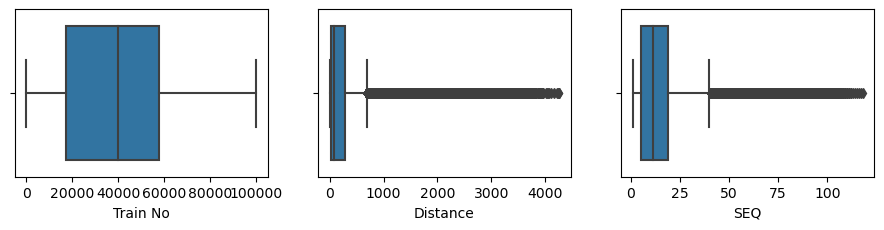

In [23]:
# to check outliers

plt.figure(figsize=(15,10))

plt.subplot(4,4,1)
sns.boxplot(trains['Train No']);

plt.subplot(4,4,2)
sns.boxplot(trains['Distance']);

plt.subplot(4,4,3)
sns.boxplot(trains['SEQ']);

In [24]:
# removing outliers

no_outlier =[]

def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    
     #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [25]:
outlier_list = [x for x in trains_n.columns if x not in no_outlier]

for i in trains_n[outlier_list]:    
    trains_n[i]=treat_outlier(trains_n[i])

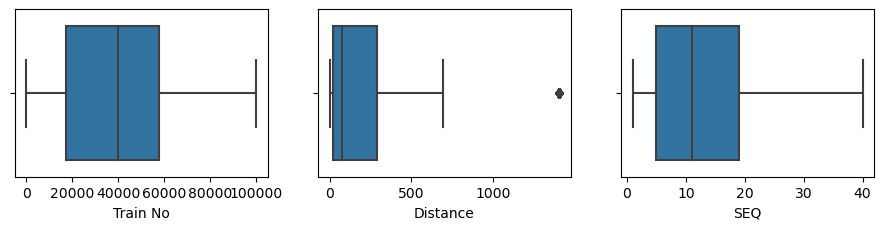

In [26]:
# removing or clipping outliers

plt.figure(figsize=(15,10))

plt.subplot(4,4,1)
sns.boxplot(trains_n['Train No']);

plt.subplot(4,4,2)
sns.boxplot(trains_n['Distance']);

plt.subplot(4,4,3)
sns.boxplot(trains_n['SEQ']);

In [27]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(trains_n[column].describe(),end=' ')


    plt.figure()
    print("\n")
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(trains_n[column], kde=True, color='y');
    plt.show()

    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=trains_n[column],color='y')
    plt.show()

Description of Train No
----------------------------------------------------------------------------
count    186114.000000
mean      42151.868752
std       25091.160198
min         107.000000
25%       17221.000000
50%       40049.000000
75%       57550.000000
max       99908.000000
Name: Train No, dtype: float64 

Distribution of Train No
----------------------------------------------------------------------------


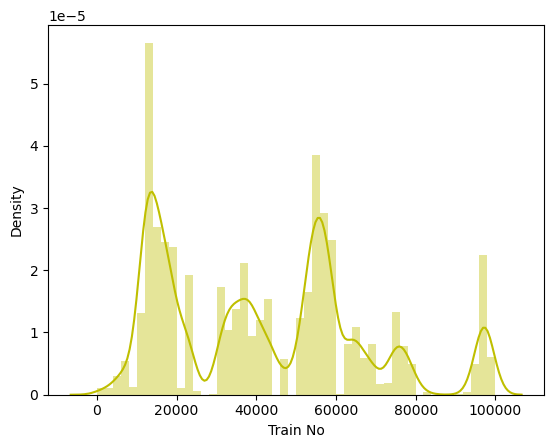

BoxPlot of Train No
----------------------------------------------------------------------------


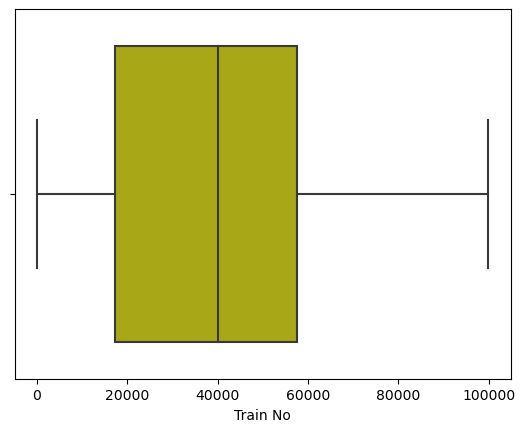

Description of SEQ
----------------------------------------------------------------------------
count    186114.000000
mean         13.203977
std          10.364192
min           1.000000
25%           5.000000
50%          11.000000
75%          19.000000
max          40.000000
Name: SEQ, dtype: float64 

Distribution of SEQ
----------------------------------------------------------------------------


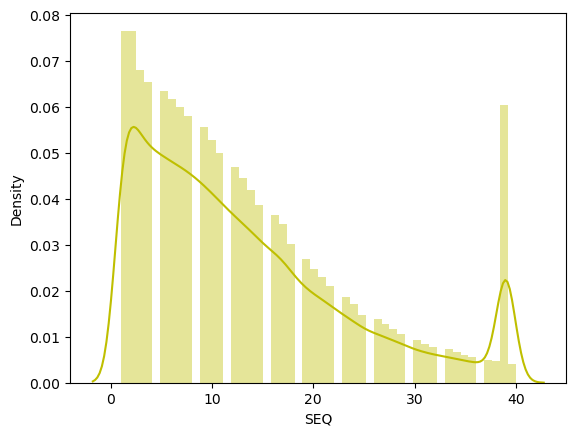

BoxPlot of SEQ
----------------------------------------------------------------------------


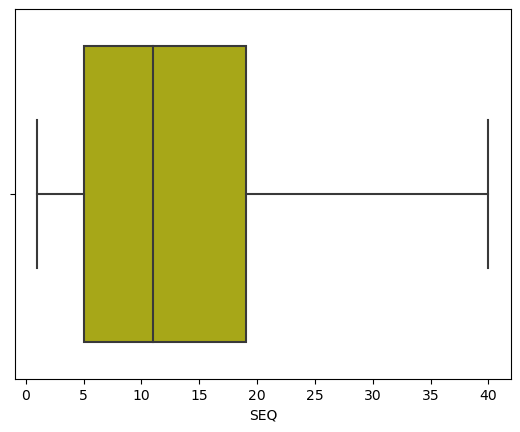

Description of Distance
----------------------------------------------------------------------------
count    186114.000000
mean        287.575524
std         454.849263
min           0.000000
25%          23.000000
50%          73.000000
75%         291.000000
max        1408.000000
Name: Distance, dtype: float64 

Distribution of Distance
----------------------------------------------------------------------------


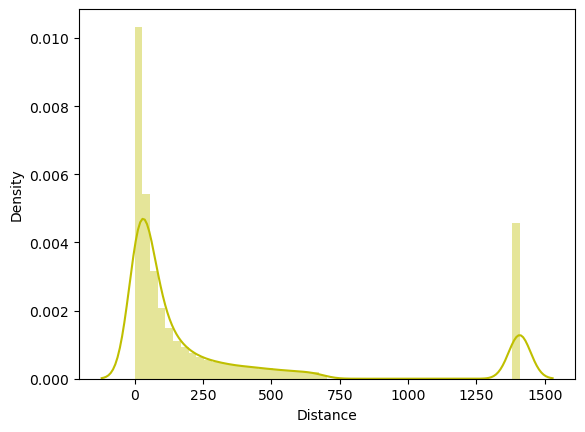

BoxPlot of Distance
----------------------------------------------------------------------------


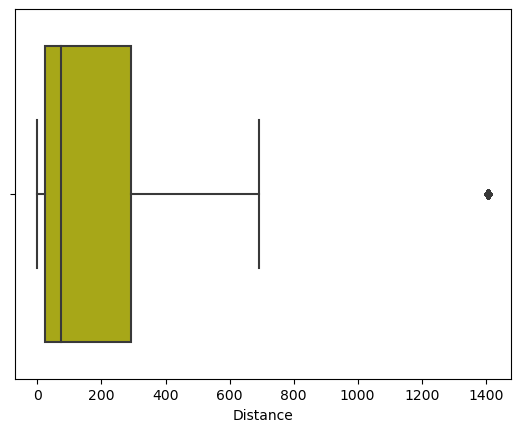

In [28]:
for x in trainsnumericcolumns:
    univariateAnalysis_numeric(x,10)

In [29]:
for column in trains.columns:
    if trains[column].dtype == 'object':
        print(column.upper(),': ',trains[column].nunique())
        print(trains[column].value_counts().sort_values())
        print('\n')

TRAIN NAME :  7580
SKP13              2
TV 103             2
TV104              2
TV 101             2
TV102              2
                ... 
BDC-HWH LOCA     646
BWN-HWH(CHOR     691
TBM-MSB EMU      827
PASS            1135
MSB-TBM EMU     2436
Name: Train Name, Length: 7580, dtype: int64


STATION CODE :  8147
VVKN       1
RMBG       1
MJM        1
NEWC       1
ASJP       1
        ... 
MSB      738
SDAH     745
TNA      796
KYN      828
CSMT    1027
Name: Station Code, Length: 8147, dtype: int64


STATION NAME :  8096
NATIONAL THE       1
MUGAIYUR HAL       1
MADIMANGALAM       1
LADDIVADI          1
PUDUCHATTI         1
                ... 
CHENNAI BEAC     738
SEALDAH          745
THANE            796
KALYAN JN        828
CST-MUMBAI      1027
Name: Station Name, Length: 8096, dtype: int64


ARRIVAL TIME :  1440
02:51:00      15
01:46:00      18
02:06:00      18
03:41:00      18
02:21:00      19
            ... 
09:00:00     321
16:00:00     326
18:30:00     328
06:00:00     33

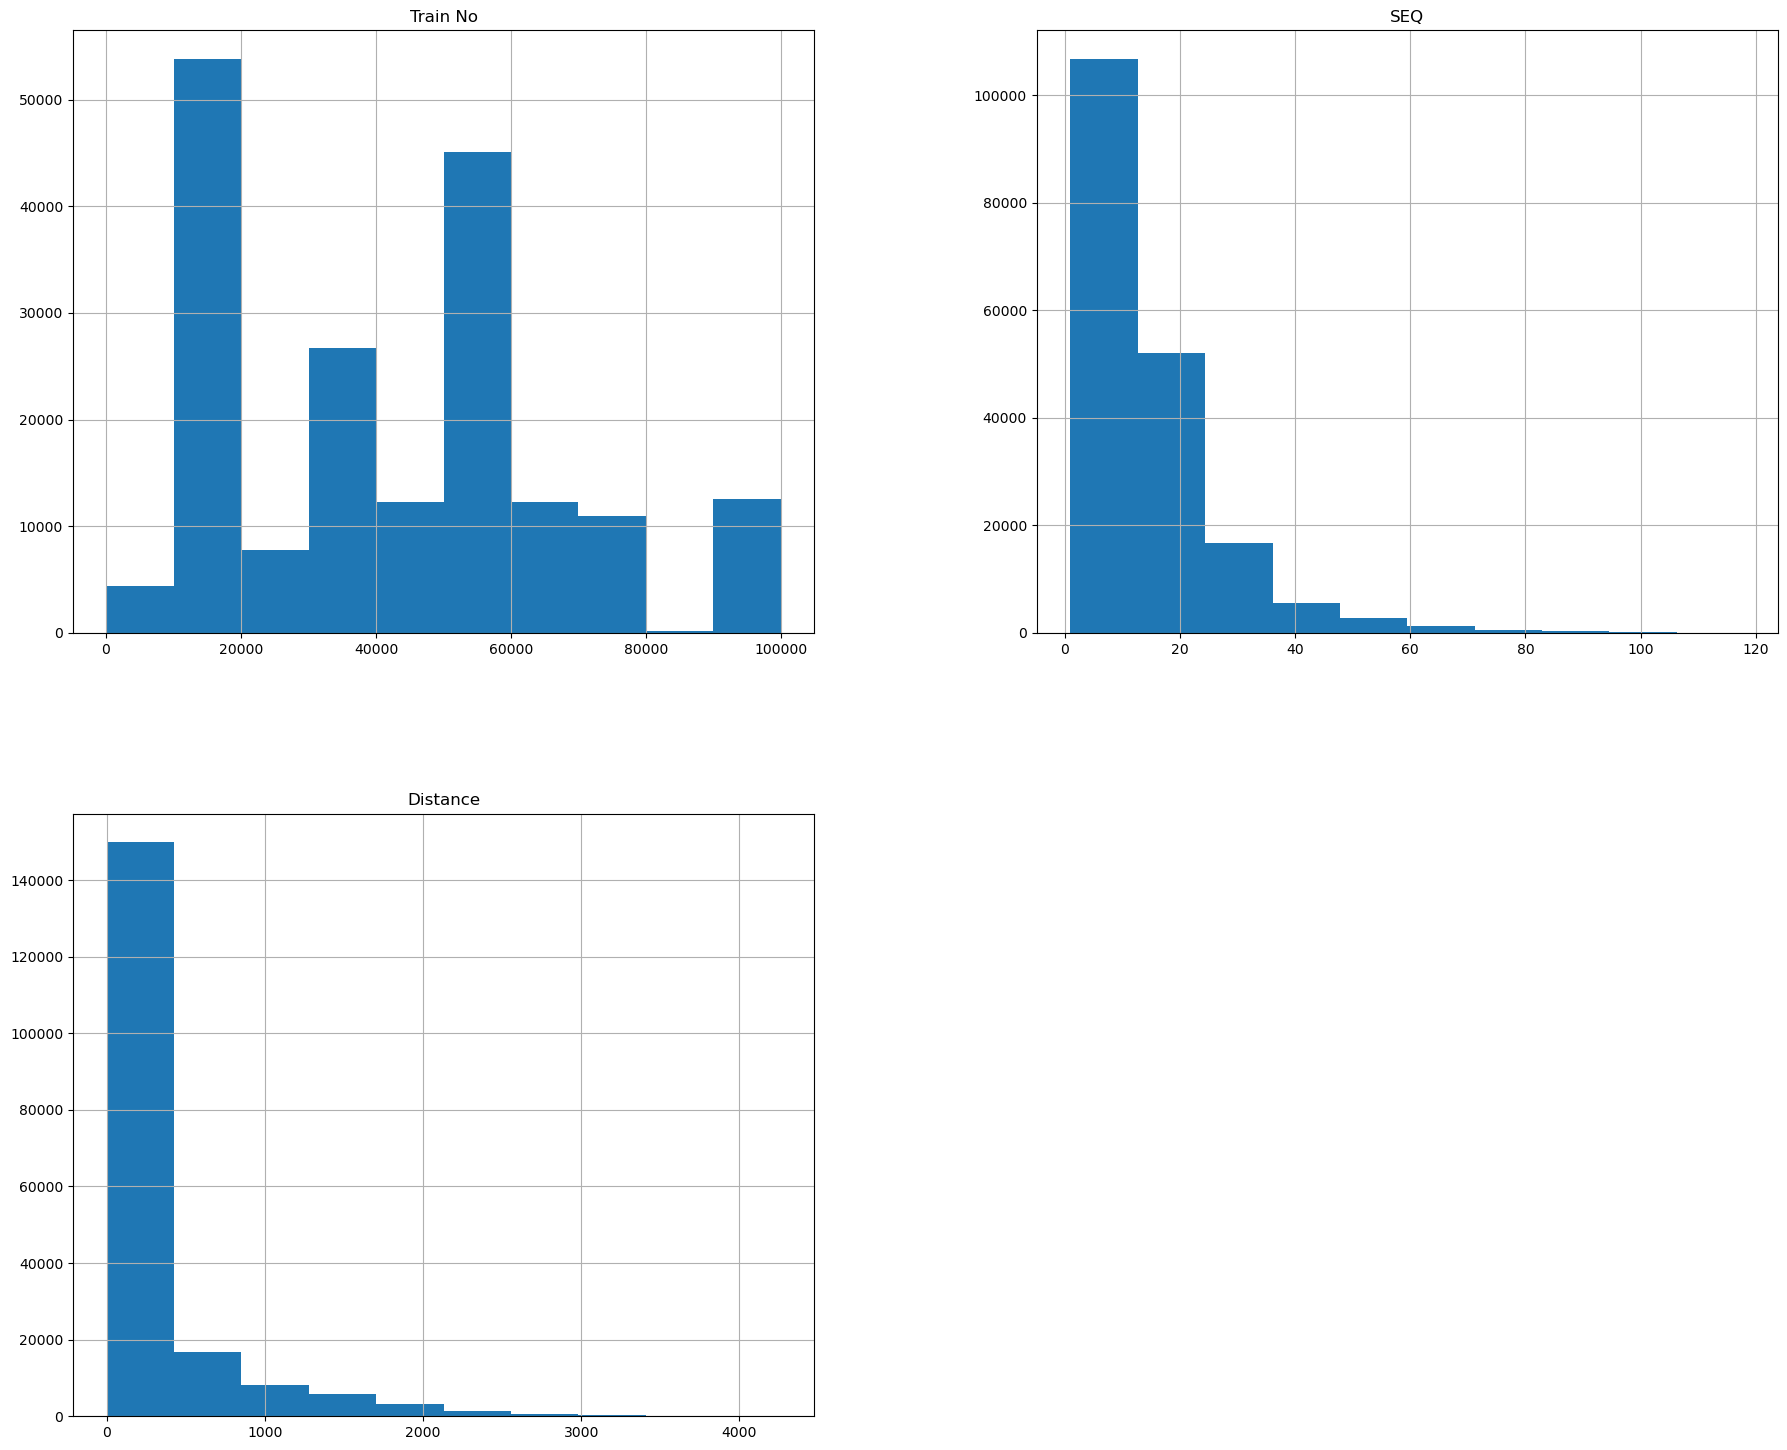

In [30]:
trains.hist(figsize=(22,18))
plt.show()

**DATA ANALYSIS THROUGH VISUALIZATION**

In [31]:
from plotly.subplots import make_subplots
plt.rcParams['figure.figsize'] = 8, 5
pd.options.plotting.backend = "plotly"

In [32]:
fig = trains.nunique().reset_index().plot(kind='bar', x='index', y=0, color=0)
fig.update_layout(title='Description of Data', xaxis_title='Variables', yaxis_title='Unique value count')
fig.show()

In [33]:
!pip install geopandas

<AxesSubplot:xlabel='Distance', ylabel='Density'>

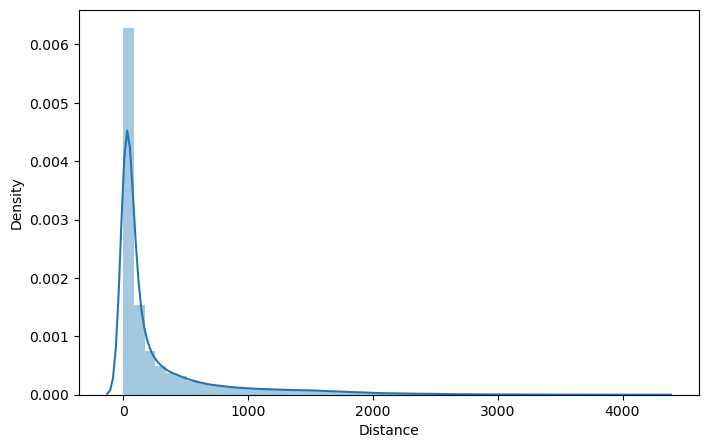

In [34]:
sns.distplot(trains['Distance'])

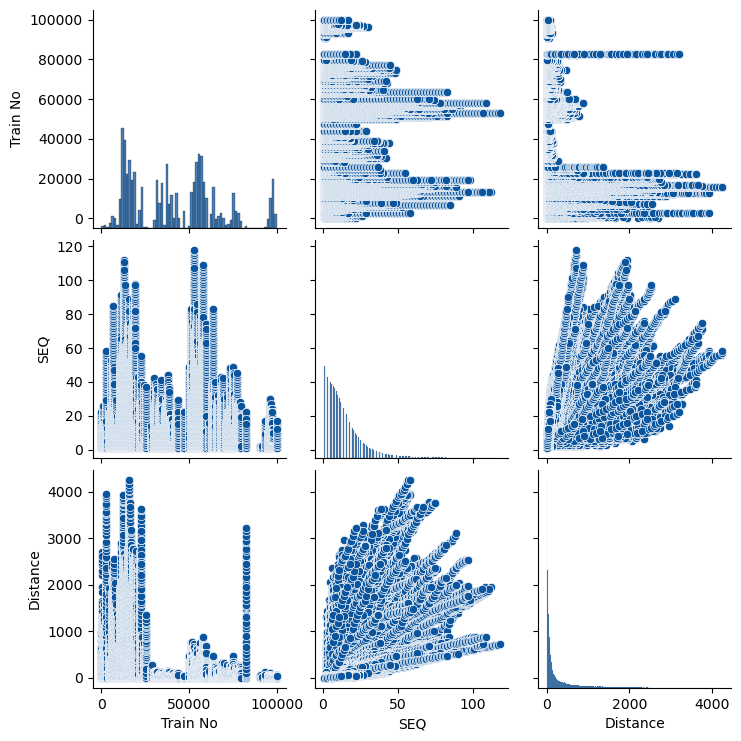

In [35]:
sns.set_palette('Blues_r')
sns.pairplot(trains);

In [36]:
trains.columns

Index(['Train No', 'Train Name', 'SEQ', 'Station Code', 'Station Name',
       'Arrival time', 'Departure Time', 'Distance', 'Source Station',
       'Source Station Name', 'Destination Station',
       'Destination Station Name'],
      dtype='object')

In [37]:
# Groupby Station Name

trains2=trains.groupby(['Station Name']).count()
trains2.head(20)

Train No  Train Name  SEQ  Station Code  Arrival time  \
Station Name                                                          
.BAGHAJATIN        217         217  217           217           217   
ABADA               90          90   90            90            90   
ABHAIPUR            62          62   62            62            62   
ABHANPUR JN.        12          12   12            12            12   
ABHAYAPURI A         6           6    6             6             6   
ABJUGANJ             6           6    6             6             6   
ABOHAR              28          28   28            28            28   
ABU ROAD           100         100  100           100           100   
ABUTARA HALT         6           6    6             6             6   
ACHAL GANJ           6           6    6             6             6   
ACHALDA             10          10   10            10            10   
ACHARYA NARE        14          14   14            14            14   
ACHEGAON             6           6    6             6             6   
ACHHNERA JN.        52          52   52            52            52   
ADALPAHARI           1           1    1             1             1   
ADAPUR               8           8    8             8             8   
ADARKI               4           4    4             4             4   
ADARSH NAGAR        25          25   25            25            25   
ADARSHNAGAR          2           2    2             2             2   
ADAS ROAD           18          18   18            18            18   

              Departure Time  Distance  Source Station  Source Station Name  \
Station Name                                                                  
.BAGHAJATIN              217       217             217                  217   
ABADA                     90        90              90                   90   
ABHAIPUR                  62        62              62                   62   
ABHANPUR JN.              12        12              12                   12   
ABHAYAPURI A               6         6               6                    6   
ABJUGANJ                   6         6               6                    6   
ABOHAR                    28        28              28                   28   
ABU ROAD                 100       100             100                  100   
ABUTARA HALT               6         6               6                    6   
ACHAL GANJ                 6         6               6                    6   
ACHALDA                   10        10              10                   10   
ACHARYA NARE              14        14              14                   14   
ACHEGAON                   6         6               6                    6   
ACHHNERA JN.              52        52              52                   52   
ADALPAHARI                 1         1               1                    1   
ADAPUR                     8         8               8                    8   
ADARKI                     4         4               4                    4   
ADARSH NAGAR              25        25              25                   25   
ADARSHNAGAR                2         2               2                    2   
ADAS ROAD                 18        18              18                   18   

              Destination Station  Destination Station Name  
Station Name                                                 
.BAGHAJATIN                   217                       217  
ABADA                          90                        90  
ABHAIPUR                       62                        62  
ABHANPUR JN.                   12                        12  
ABHAYAPURI A                    6                         6  
ABJUGANJ                        6                         6  
ABOHAR                         28                        28  
ABU ROAD                      100                       100  
ABUTARA HALT                    6                         6  
ACHAL GANJ                    

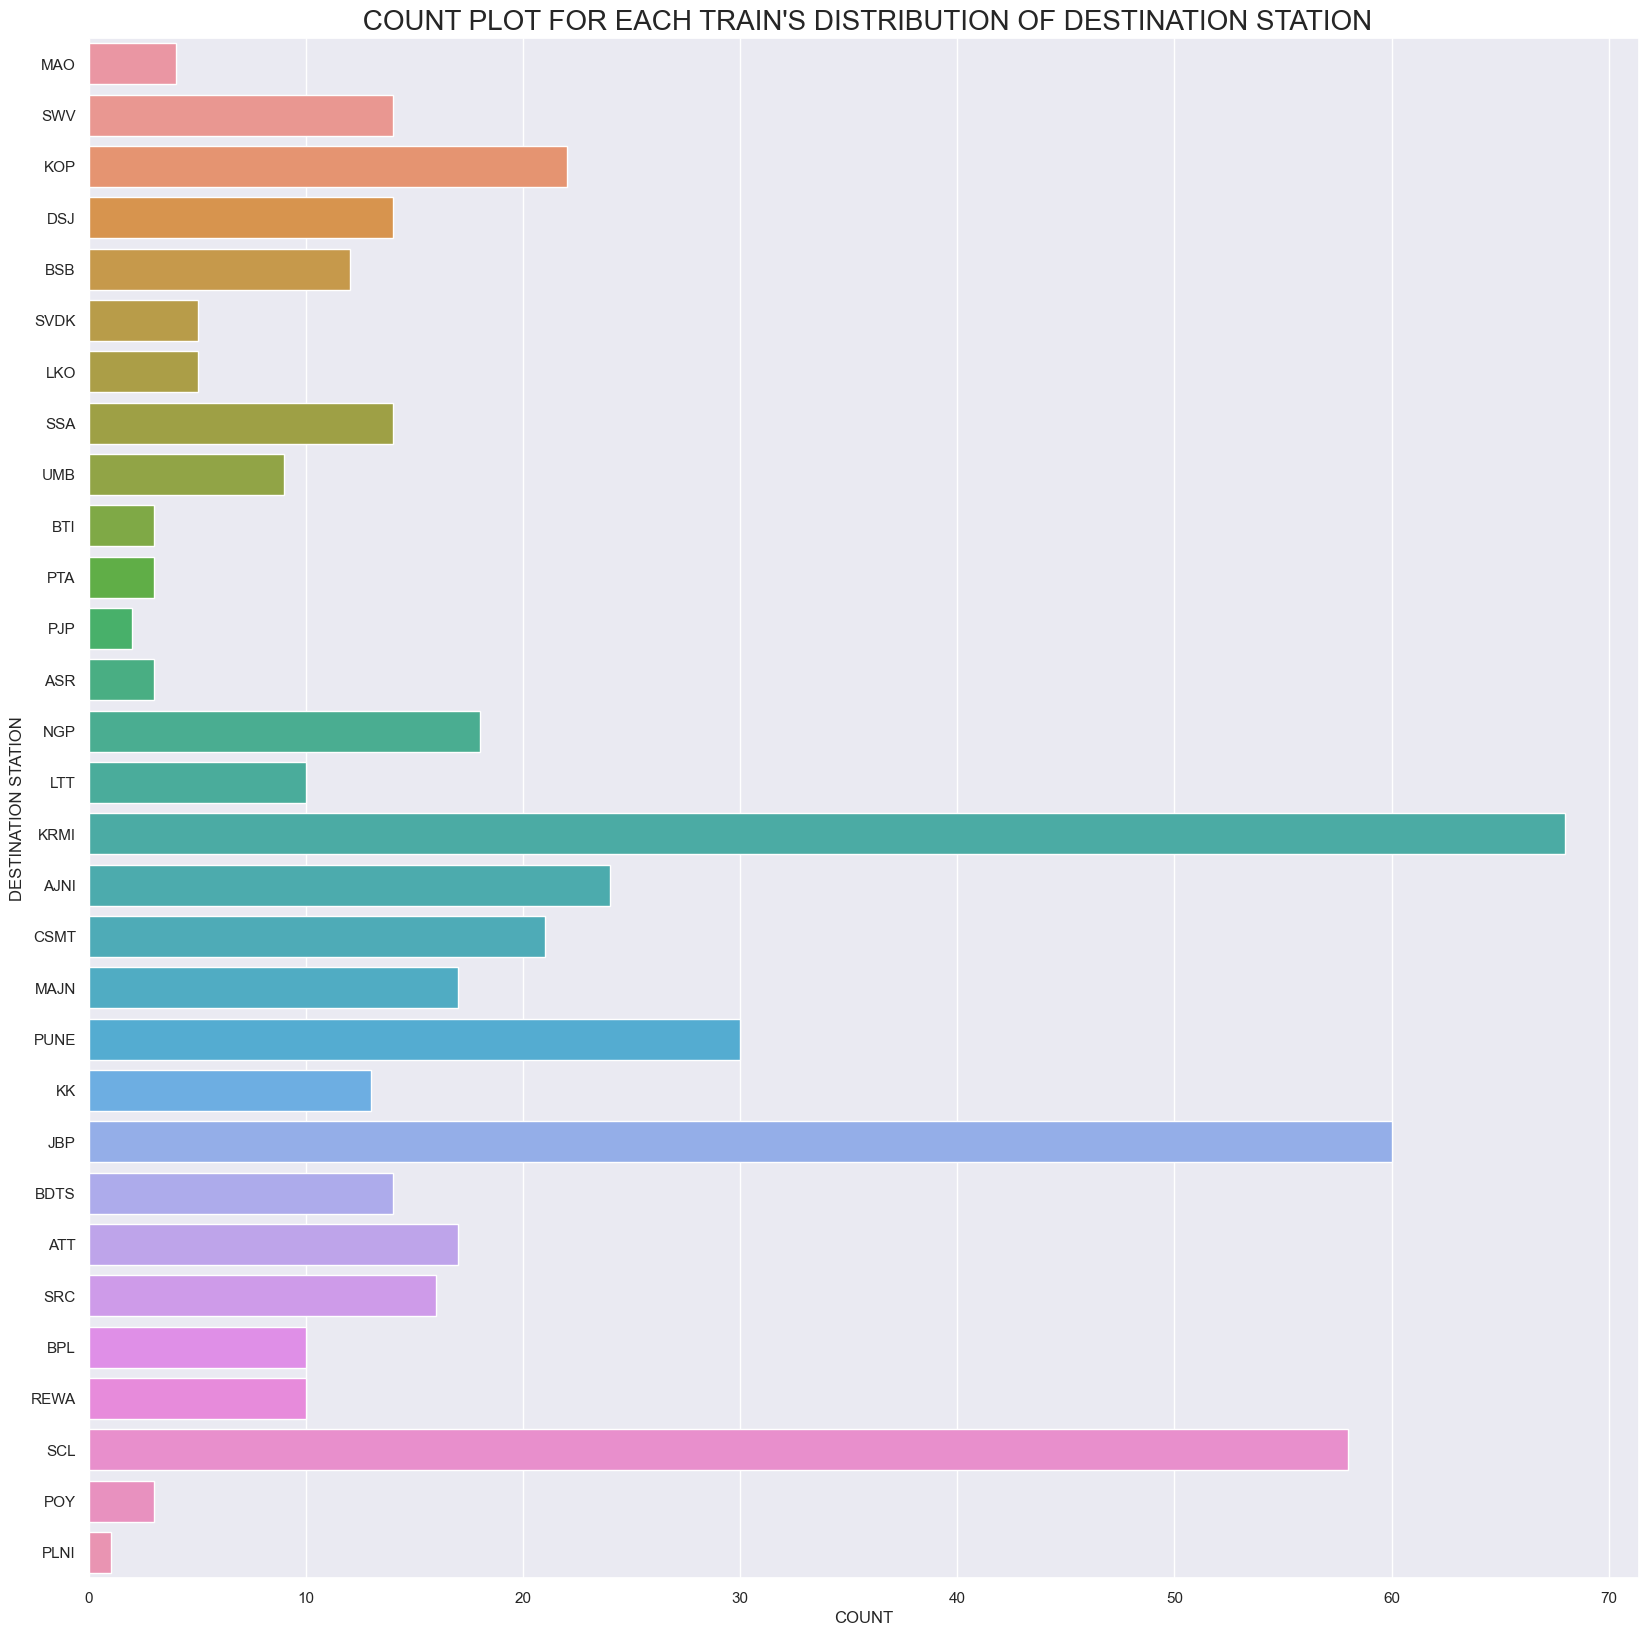

In [38]:
plt.figure(figsize=(20,20))
sns.set(style="darkgrid")
ax = sns.countplot(y="Destination Station", data=trains.head(500))
plt.title(" COUNT PLOT FOR EACH TRAIN'S DISTRIBUTION OF DESTINATION STATION", fontsize = 20)
plt.ylabel('DESTINATION STATION')
plt.xlabel('COUNT');

In [40]:
trains3=trains.groupby(['Train Name']).count()
trains3

Train No  SEQ  Station Code  Station Name  Arrival time  \
Train Name                                                              
 KGG JMP DEM         5    5             5             5             5   
 LGL KNJ EMU        44   44            44            44            44   
1JA JUC-ASR         10   10            10            10            10   
A1                   4    4             4             4             4   
A10                  2    2             2             2             2   
...                ...  ...           ...           ...           ...   
`BWN BGNA LO         9    9             9             9             9   
chhapra-math        22   22            22            22            22   
mathura - ch        22   22            22            22            22   
sabarimalai         77   77            77            77            77   
tpty spl            11   11            11            11            11   

              Departure Time  Distance  Source Station  Source Station Name  \
Train Name                                                                    
 KGG JMP DEM               5         5               5                    5   
 LGL KNJ EMU              44        44              44                   44   
1JA JUC-ASR               10        10              10                   10   
A1                         4         4               4                    4   
A10                        2         2               2                    2   
...                      ...       ...             ...                  ...   
`BWN BGNA LO               9         9               9                    9   
chhapra-math              22        22              22                   22   
mathura - ch              22        22              22                   22   
sabarimalai               77        77              77                   77   
tpty spl                  11        11              11                   11   

              Destination Station  Destination Station Name  
Train Name                                                   
 KGG JMP DEM                    5                         5  
 LGL KNJ EMU                   44                        44  
1JA JUC-ASR                    10                        10  
A1                              4                         4  
A10                             2                         2  
...                           ...                       ...  
`BWN BGNA LO                    9                         9  
chhapra-math                   22                        22  
mathura - ch                   22                        22  
sabarimalai                    77                        77  
tpty spl                       11                        11  

[7580 rows x 11 columns]

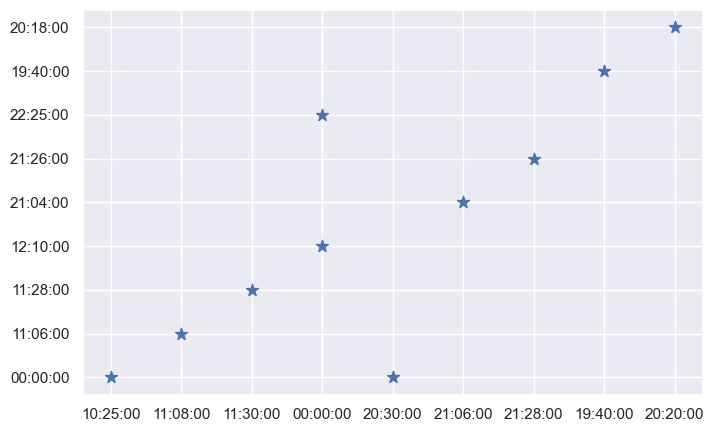

In [42]:
 # DEPARTURE TIME vs ARRIVAL TIME

plt.scatter(trains['Departure Time'].head(10),trains['Arrival time'].head(10),label='TIME TABLE',marker='*',s=80)


In [43]:
trains.groupby("Train Name").Distance.agg(["sum","mean","min","max","count","median","std","var"])

sum        mean  min   max  count  median         std  \
Train Name                                                              
 KGG JMP DEM     64   12.800000    0    28      5    11.0   10.709809   
 LGL KNJ EMU   2709   61.568182    0   127     44    59.0   39.273281   
1JA JUC-ASR     336   33.600000    0    68     10    34.0   23.090161   
A1               12    3.000000    0     6      4     3.0    2.581989   
A10               6    3.000000    0     6      2     3.0    4.242641   
...             ...         ...  ...   ...    ...     ...         ...   
`BWN BGNA LO    107   11.888889    0    26      9    11.0    7.540631   
chhapra-math   8993  408.772727    0   879     22   374.0  269.851976   
mathura - ch  10370  471.363636    0   884     22   506.0  271.416662   
sabarimalai   62306  809.168831    0  1641     77   792.0  520.378895   
tpty spl       2841  258.272727    0   597     11   211.0  218.931538   

                        var  
Train Name                   
 KGG JMP DEM     114.700000  
 LGL KNJ EMU    1542.390592  
1JA JUC-ASR      533.155556  
A1                 6.666667  
A10               18.000000  
...                     ...  
`BWN BGNA LO      56.861111  
chhapra-math   72820.088745  
mathura - ch   73667.004329  
sabarimalai   270794.194805  
tpty spl       47931.018182  

[7580 rows x 8 columns]

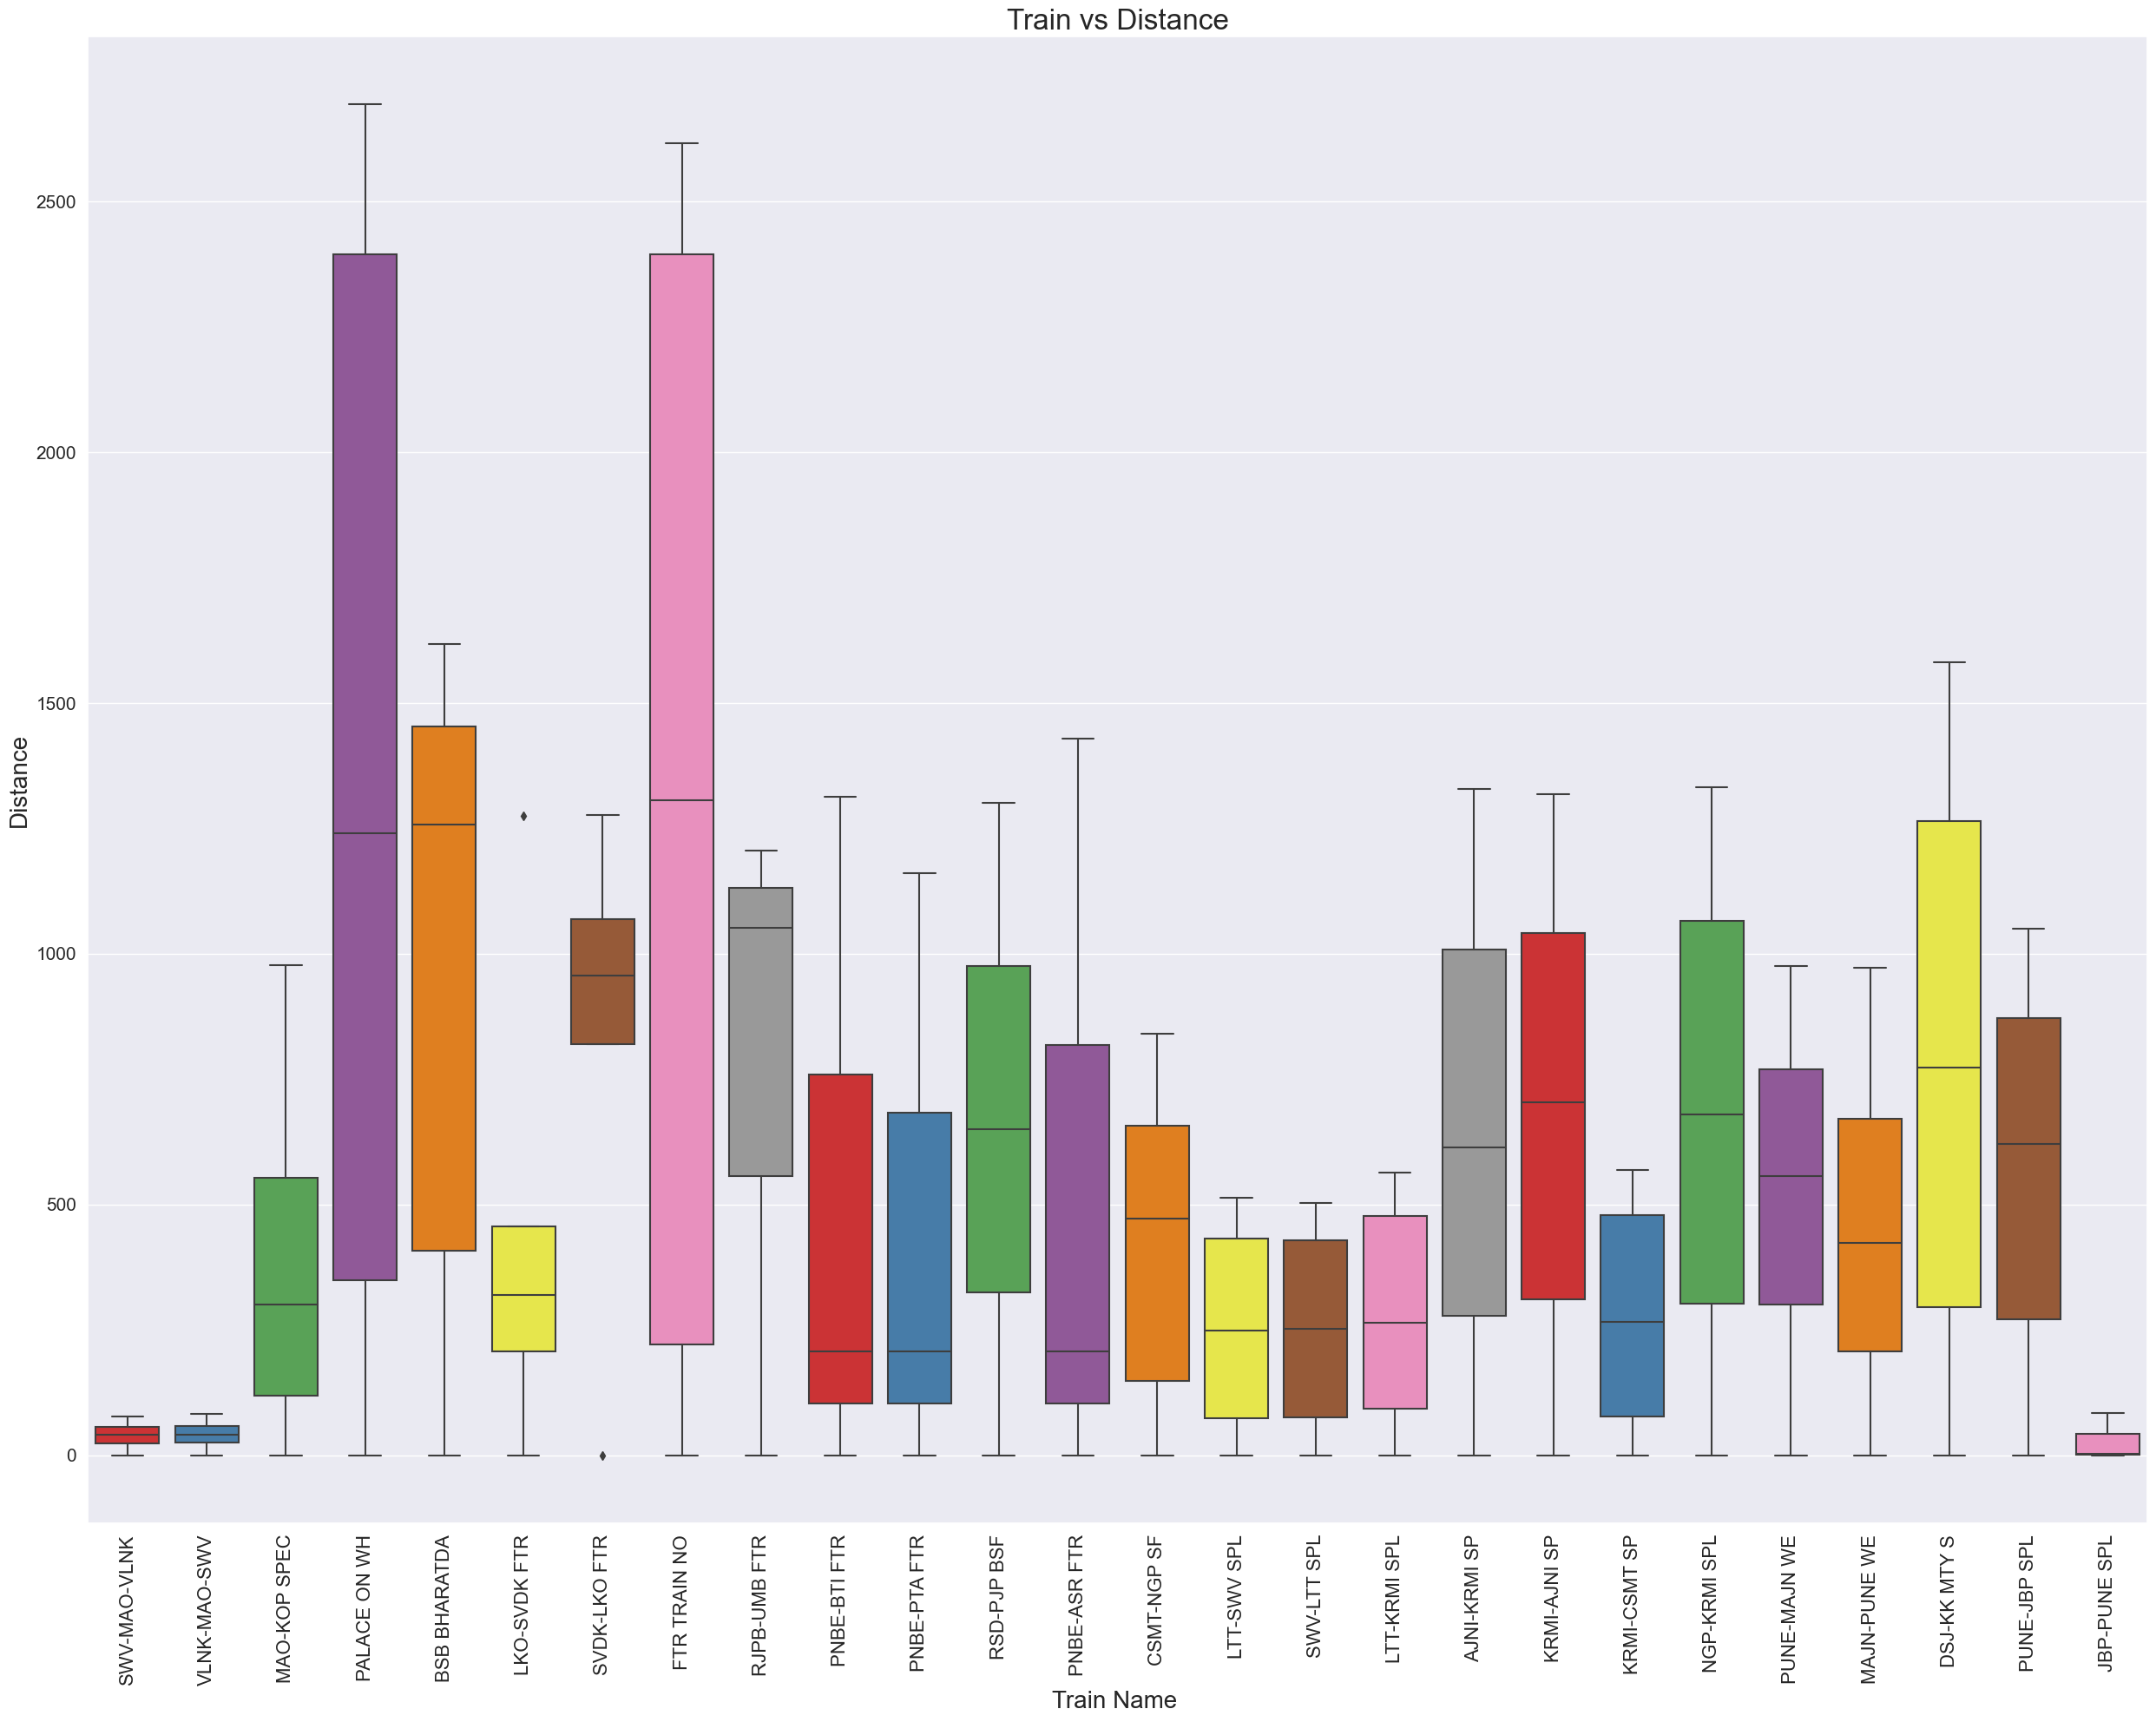

In [44]:
plt.figure(figsize=[25,20])
ax = sns.boxplot(x='Train Name', y='Distance',data= trains.head(300),palette='Set1')
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=15)
plt.title('Train vs Distance',fontsize =24)
plt.xlabel('Train Name ',fontsize = 20)
plt.ylabel('Distance',fontsize = 20)
plt.tight_layout()

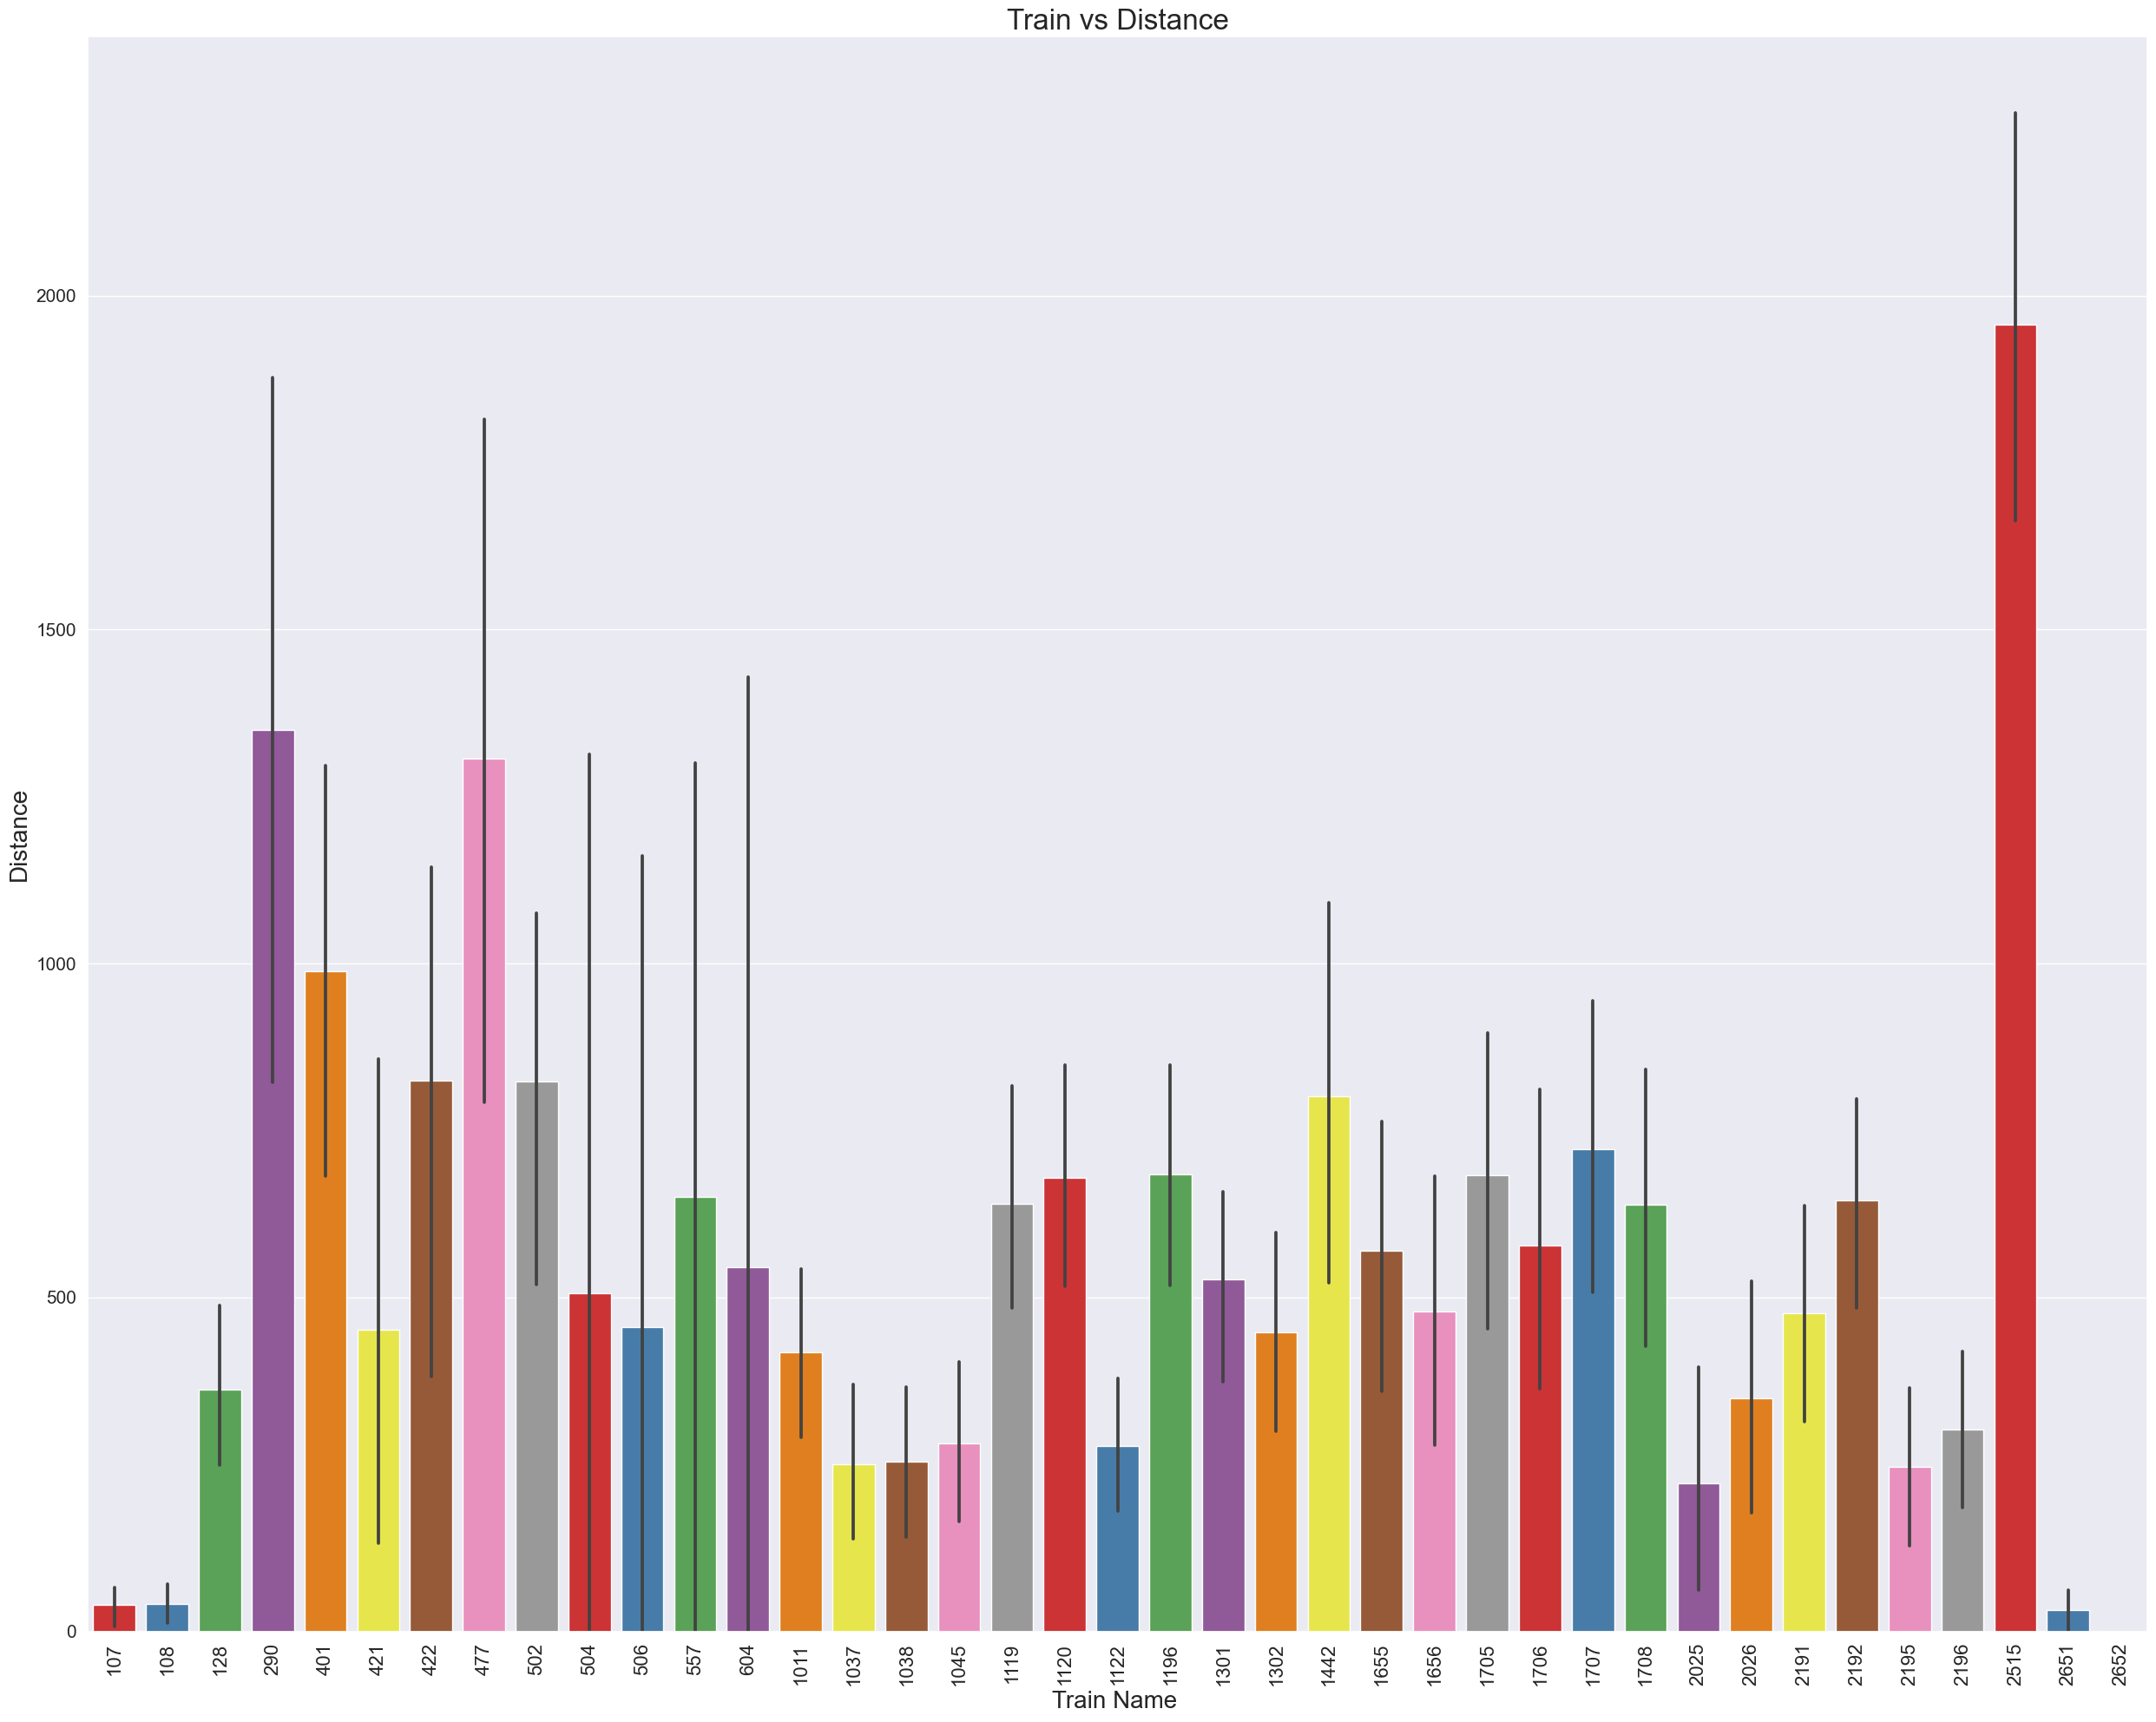

In [45]:
plt.figure(figsize=[25,20])
ax = sns.barplot(x='Train No', y='Distance',data= trains.head(500),palette='Set1')
plt.xticks(rotation=90,fontsize=16)
plt.yticks(fontsize=15)
plt.title('Train vs Distance',fontsize =24)
plt.xlabel('Train Name ',fontsize = 20)
plt.ylabel('Distance',fontsize = 20)
plt.tight_layout()

In [46]:
trains.corr()

Train No       SEQ  Distance
Train No  1.000000 -0.145541 -0.461903
SEQ      -0.145541  1.000000  0.533973
Distance -0.461903  0.533973  1.000000

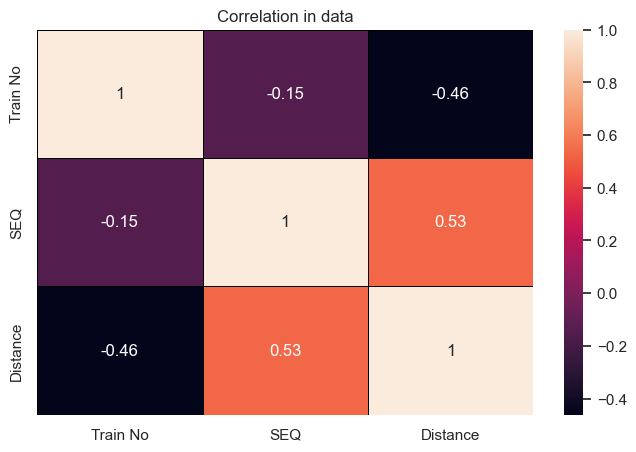

In [47]:
plt.figure(figsize=(8,5))
sns.heatmap(trains.corr(),annot=True,linewidth=0.5,linecolor="black")
plt.title('Correlation in data')
plt.show()

In [48]:
trains.columns.values

array(['Train No', 'Train Name', 'SEQ', 'Station Code', 'Station Name',
       'Arrival time', 'Departure Time', 'Distance', 'Source Station',
       'Source Station Name', 'Destination Station',
       'Destination Station Name'], dtype=object)

In [49]:
df = trains[['Station Name','Train Name']].copy().dropna()
df['Train_count'] = df.groupby(['Station Name','Train Name'])['Train Name'].transform('count')
df = df.drop_duplicates().sort_values('Train_count').tail(200)
fig = df.plot(kind='bar',x='Station Name',y='Train_count',color='Train Name')
fig.update_layout(title="Top 10 train routes")
fig.show()

In [50]:
# Leading station with more number of train trips

trains4 = trains["Station Name"].value_counts()
trains4.head(50)

CST-MUMBAI      1027
KALYAN JN        828
THANE            796
SEALDAH          745
CHENNAI BEAC     738
HOWRAH JN.       699
DADAR            598
DUM DUM JN.      463
KURLA            462
TAMBARAM         434
VIJAYWADA JN     416
GHAT KOPAR       406
BIDHANNAGAR      404
PANVEL           402
MUMBAI (MATU     393
MULUND           393
MUMBAI (BYCU     392
LUCKNOW JN.      385
KANPUR CENTR     383
VADODARA JN.     378
BHANDUP          373
VIKHROLI         370
VIDYAVIHAR       356
NEW DELHI        355
NAHUR            355
MUMBAI(PAREL     346
MUMBAI (MASJ     344
MUMBAI CURRE     344
MUMBAI SANDH     344
MUMBAI (CHIN     344
PERAMBUR         342
BANDEL JN.       325
BARDDHAMAN J     319
SURAT            318
KHARAGPUR        309
CHENNAI EGMO     309
NAIHATI JN.      307
LILUAH           306
AHMEDABAD        305
BALLYGUNGE J     300
BHUSAVAL JN.     298
BELUR            295
VILLIVAKKAM      293
MUGHAL SARAI     292
AVADI            291
ITARSI           291
SECUNDERABAD     288
AMBATTUR     

In [51]:
# Station with more train frequency 

trains4 = trains.groupby(['Station Name'])['Train Name'].value_counts()

trains4.head(20)

Station Name  Train Name  
.BAGHAJATIN   CG - SDAH  L    24
              LKPR - SDAH     24
              DH - SDAH LO    22
              SDAH - CG LO    22
              SDAH-DH LOCA    22
              SDAH-LKPR LO    22
              BRP - SDAH L    20
              SDAH - BRP L    20
              SDAH- SPR LO    11
              SPR - SDAH L    10
              SDAH-SPR LOC     2
              BBDB - BRP L     1
              BNJ - CG LOC     1
              CG - BT LOCA     1
              CG-SDAH LOCA     1
              CHT - MJT LO     1
              DH SDAH LOCA     1
              DH-SDAH LOCA     1
              LKPR - MJT L     1
              MGT- SDAH LO     1
Name: Train Name, dtype: int64

In [52]:
# top 50 trains with max distance travelled

train_50 = trains.drop(["SEQ", "Station Code", "Source Station","Destination Station"], axis=1)
train_50 = train_50.sort_values(by="Distance", ascending=False)[:50]
train_50.style.background_gradient(cmap='twilight_r',high=0.5, subset=["Distance"])

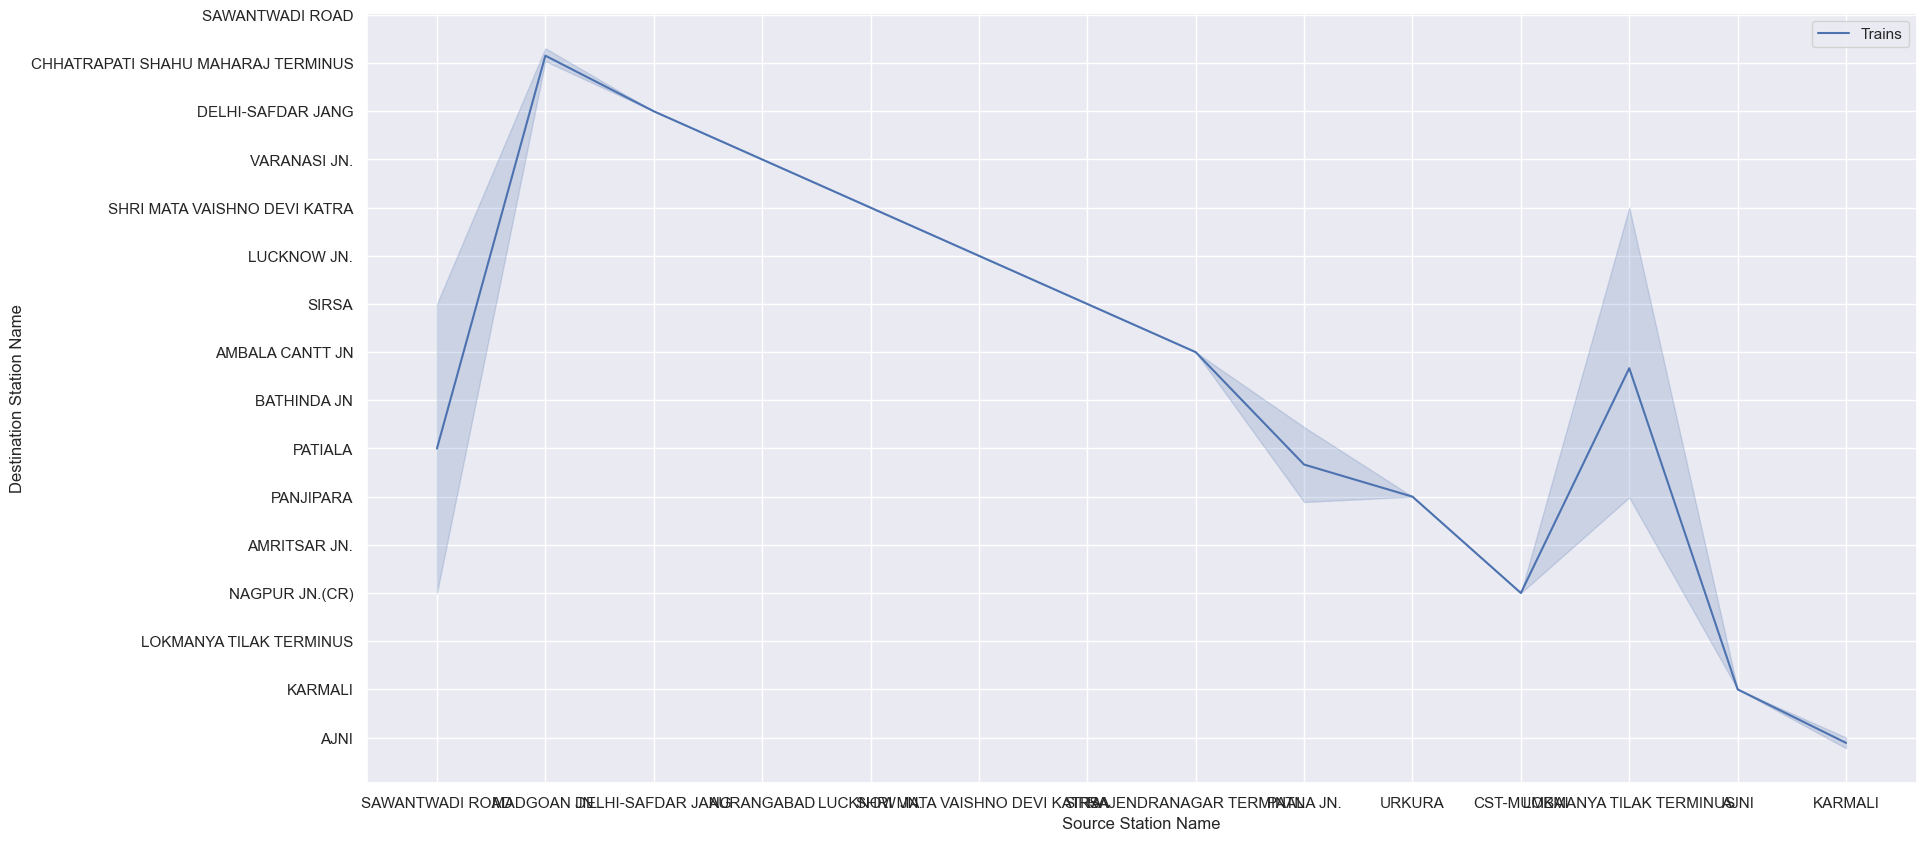

In [53]:
plt.figure(figsize = (20,10))
sns.lineplot('Source Station Name','Destination Station Name',data=trains.head(200),label="Trains")
plt.show()